# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
data = pd.read_csv('Temp_States.csv')
temp = data.copy()

#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


In [8]:
temp.columns = [column.lower().replace(" ", "_") for column in temp.columns]

#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.dtypes

city            object
state           object
temperature    float64
dtype: object

City and State are strings and Temperature is a float.

#### Select the rows where state is New York

In [14]:
newyork = temp[temp["state"] == 'New York']

#### What is the average of the temperature of cities in New York?

In [17]:
avg_temp = newyork["temperature"].mean()
print(f" The average temperature of cities in New York is {avg_temp:.2f}")

 The average temperature of cities in New York is 10.74


#### We want to know cities and states with Temperature above 15 degress Celcius

In [33]:
above_15 = temp[temp["temperature"] > 15].reset_index(drop=True)
city_state_series = above_15.apply(lambda row: f"{row['city']}, {row['state']}", axis=1)
print(f"The cities and states with temperature above 15 degress Celcius are {city_state_series.to_string(index=False, name=False)}")

The cities and states with temperature above 15 degress Celcius are         NYC, New York
Hartford, Connecticut
   Treton, New Jersey
   Newark, New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [ ]:
print(f"The cities with temperature above 15 degrees Celcius are {', '.join(map(str, above_15['city'].to_list()))}")

The cities with temperature above 15 degrees Celcius are NYC, Hartford, Treton, Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [40]:
condition = ((temp["temperature"] > 15 )& (temp["temperature"] < 20 ))
above_15_below_20 = temp[condition].reset_index(drop=True)
above_15_below_20 

,city,state,temperature
0,NYC,New York,19.444444
1,Hartford,Connecticut,17.222222


In [44]:
city_series = above_15_below_20.apply(lambda row: f"{row['city']}, {row['state']}", axis=1)
print(f"The cities with temperature above 15 degrees Celcius but below 20 are {', '.join(map(str, above_15_below_20['city'].to_list()))}")

The cities with temperature above 15 degrees Celcius but below 20 are NYC, Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [46]:
temp.groupby("state")["temperature"].agg(['mean', 'std'])

,mean,std
state,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [49]:
data_employee = pd.read_csv('Employee.csv')
employee = data_employee.copy()
employee.columns = [column.lower().replace(" ", "_") for column in employee.columns]


#### Explore the data types of the Temp dataframe. Comment your results

In [50]:
employee.info() # There are mostly strings data types in the dataframe, only Years and Salary are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9 non-null      object
 1   department  9 non-null      object
 2   education   9 non-null      object
 3   gender      9 non-null      object
 4   title       9 non-null      object
 5   years       9 non-null      int64 
 6   salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [51]:
num = employee.select_dtypes(include="number")
cat = employee.select_dtypes(exclude="number")

In [60]:
cat_columns = [', '.join(map(str, cat.columns.to_list()))]
num_columns = [', '.join(map(str, num.columns.to_list()))]

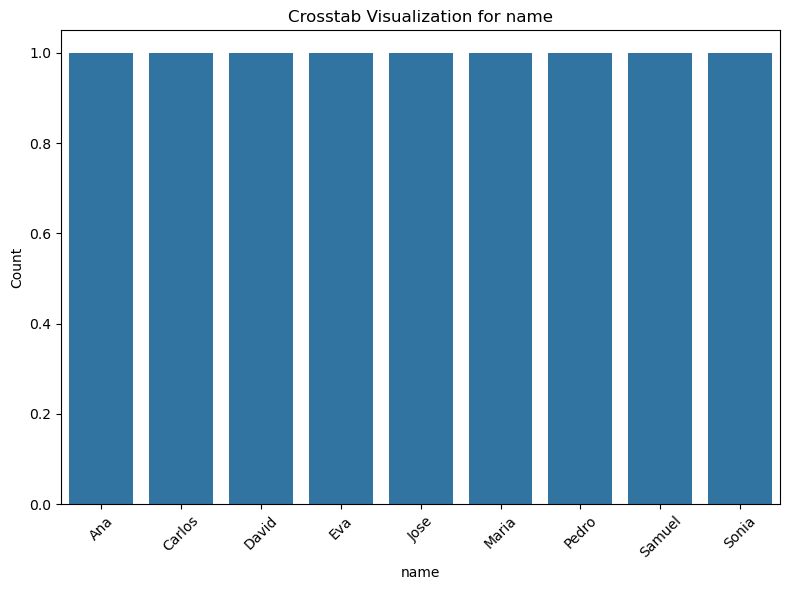

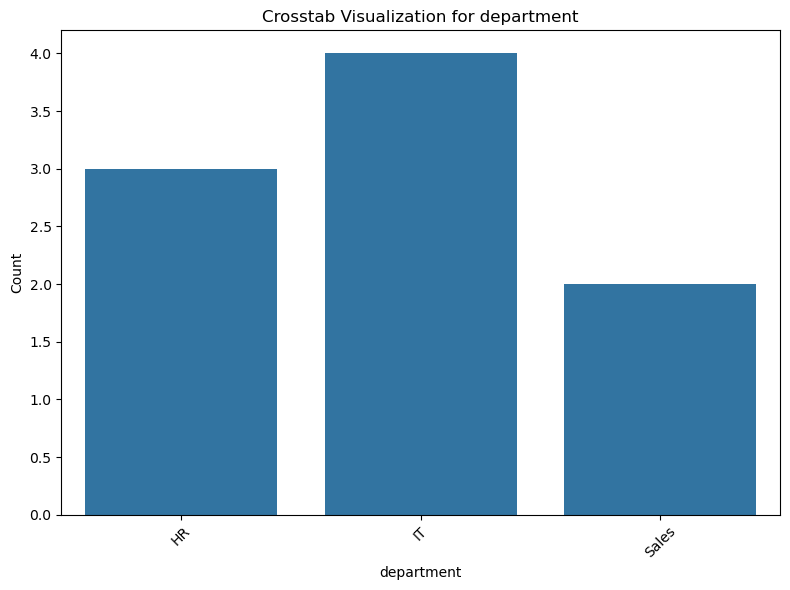

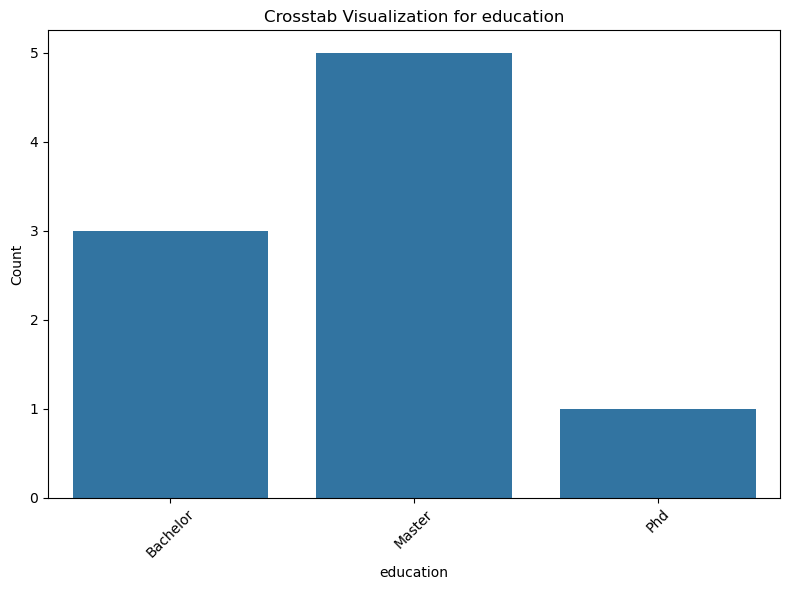

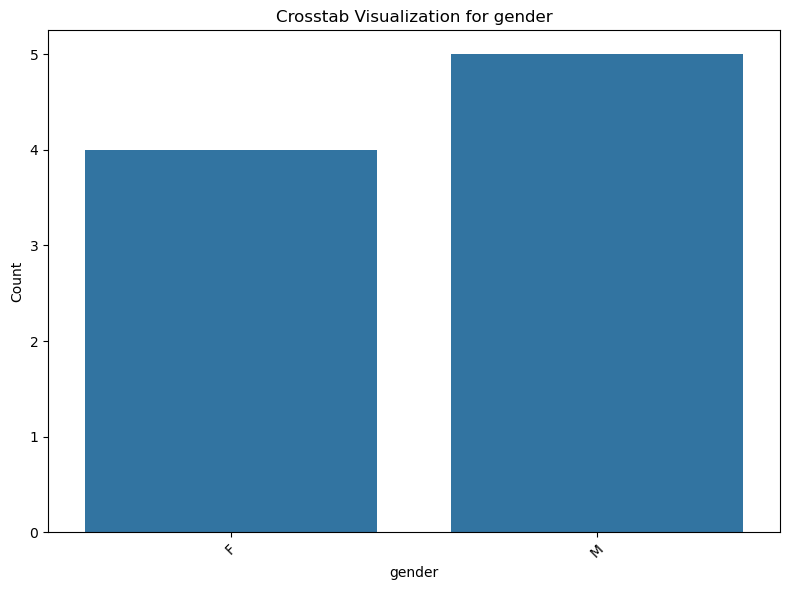

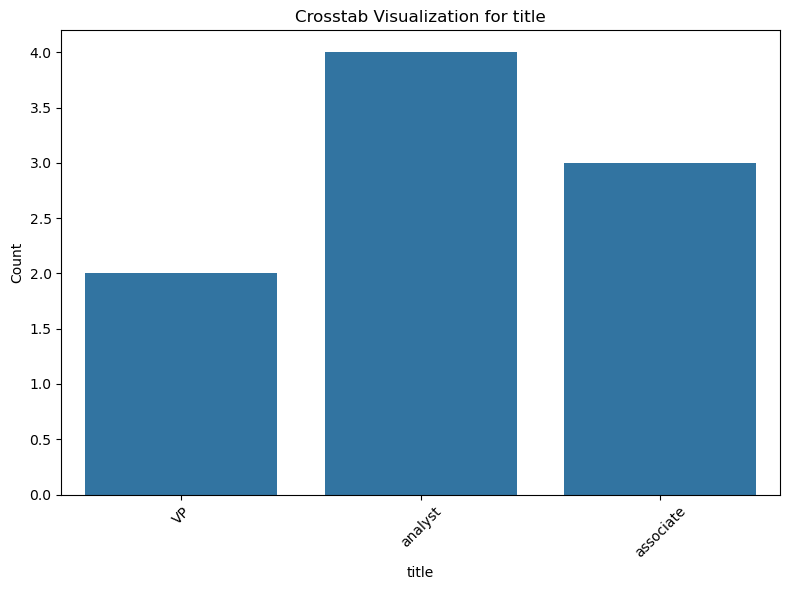

In [183]:
for column in cat.columns:
    # Create a crosstab for the current column
    result = pd.crosstab(index=cat[column], columns='count').reset_index()

    # Plot the crosstab result
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='count', data=result)
    plt.title(f'Crosstab Visualization for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

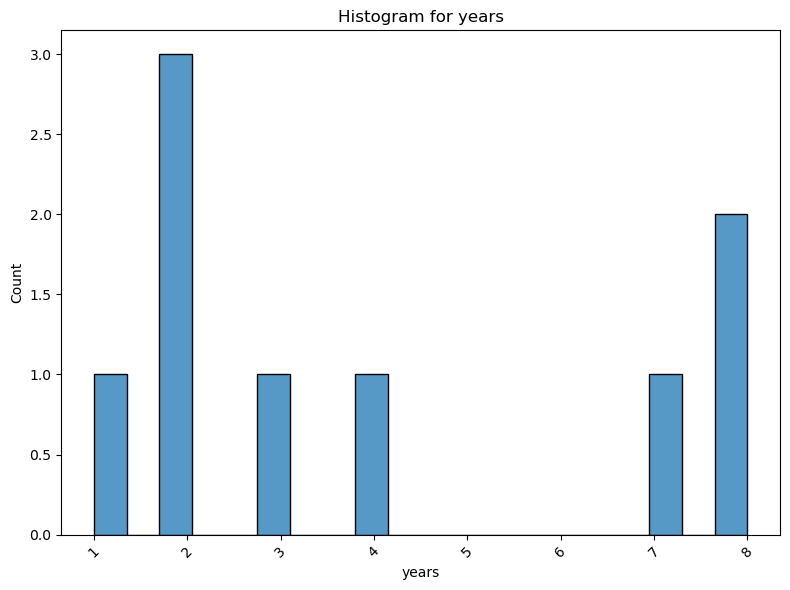

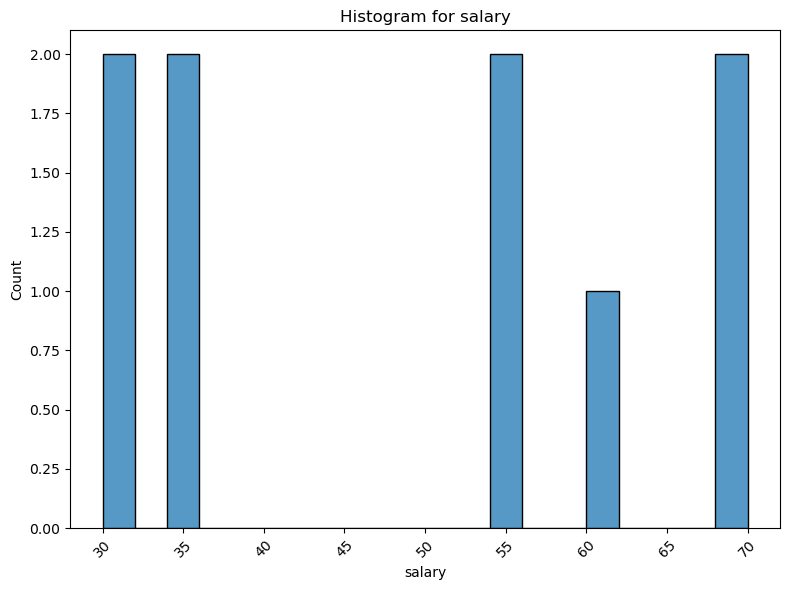

In [184]:
for column in num.columns:

    # Plot the crosstab result
    plt.figure(figsize=(8, 6))
    sns.histplot(num[column], bins=20)
    plt.title(f'Histogram for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

Description of the histograms:
2 employees have been working at the company for 8 years, three for two years and for 1,3,4 and 7 years it is only one employee each.
Two employees earn each 30, 35, 55 or 70 k per year. Only one employee earns 60 per year.

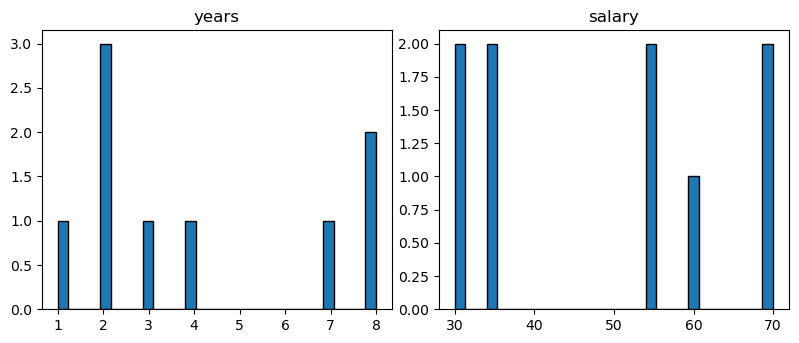

In [72]:
# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

#### What's the average salary in this company?

In [75]:
print(f" The average salary in this company is {employee["salary"].mean():.2f}")

 The average salary in this company is 48.89


#### What's the highest salary?

In [77]:
print(f" The highest salary in this company is {employee["salary"].max():.2f}")

 The highest salary in this company is 70.00


#### What's the lowest salary?

In [78]:
print(f" The lowest salary in this company is {employee["salary"].min():.2f}")

 The lowest salary in this company is 30.00


#### Who are the employees with the lowest salary?

In [80]:
low = employee["salary"].min()
lowest_employee = employee[employee["salary"] == low]

In [81]:
lowest_employee

,name,department,education,gender,title,years,salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [83]:
print(f" The employees with the lowest salary in this company are: {', '.join(map(str, lowest_employee['name'].to_list()))}")

 The employees with the lowest salary in this company are: Maria, David


#### Could you give all the information about an employee called David?

In [85]:
david =  employee[employee["name"] == 'David']
david

,name,department,education,gender,title,years,salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [88]:
', '.join(map(str,david["salary"].tolist()))

'30'

#### Print all the rows where job title is associate

In [91]:
associate =  employee[employee["title"] == 'associate']
print(associate.to_string(index=False, header=False))

Samuel Sales   Master M associate 3 55
   Eva Sales Bachelor F associate 2 55
 Pedro    IT      Phd M associate 7 60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [92]:
employee.head(3)

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [93]:
employee.iloc[:3]

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [94]:
employee1 =  employee[(employee["title"] == 'associate') & (employee["salary"] > 55)]
employee1

,name,department,education,gender,title,years,salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [95]:
employee.groupby('years')['salary'].mean()

years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: salary, dtype: float64

####  What is the average Salary per title?

In [96]:
employee.groupby('title')['salary'].mean()

title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

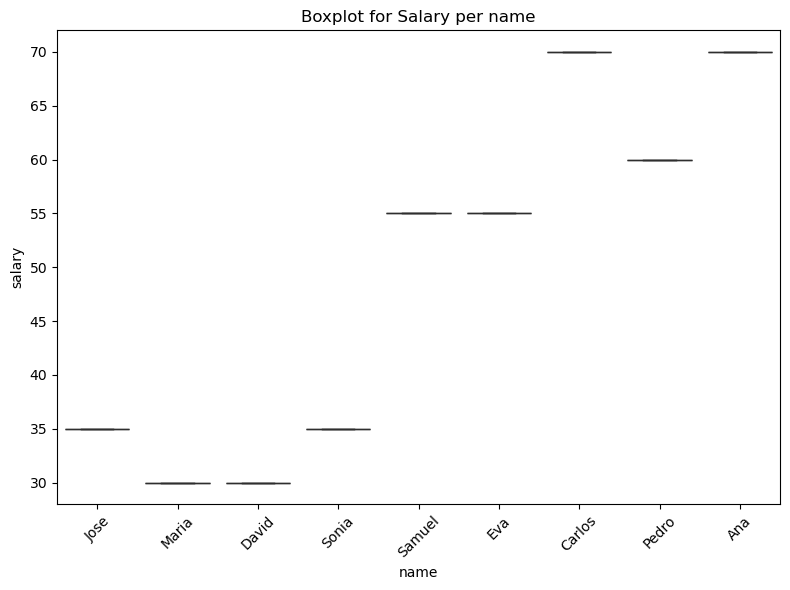

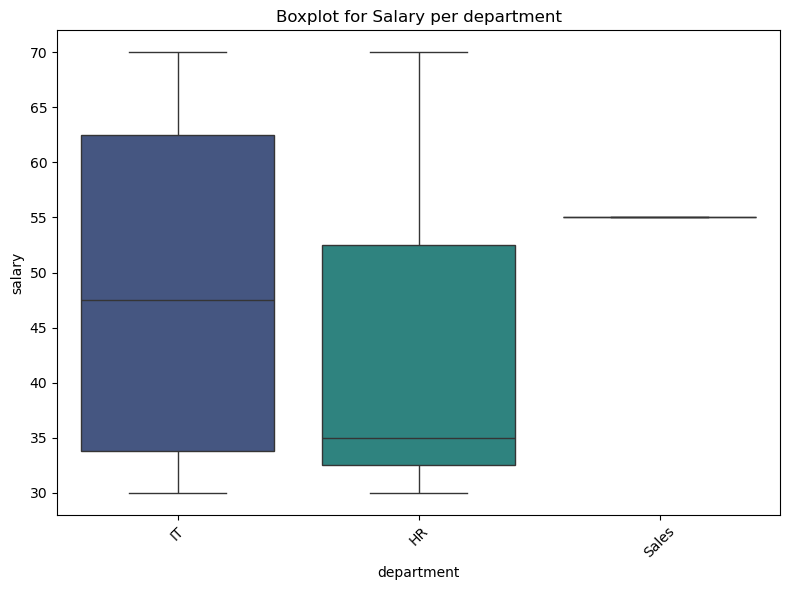

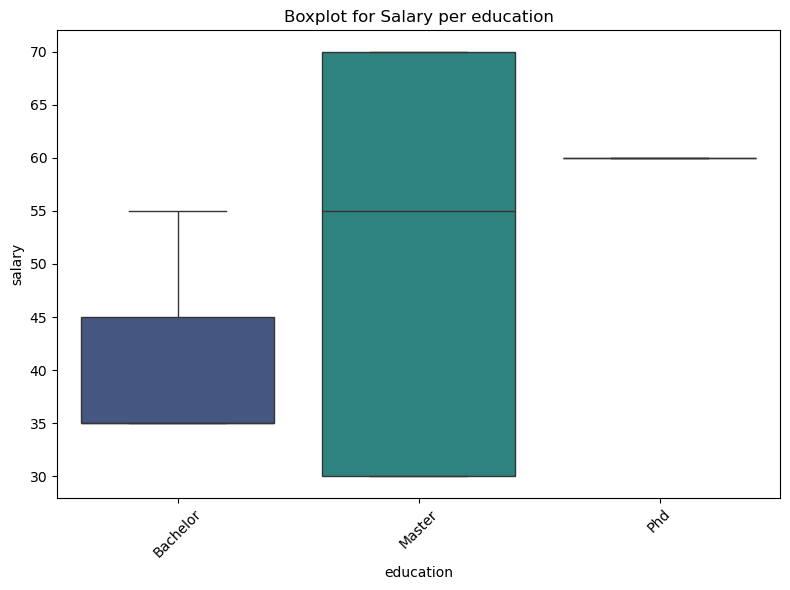

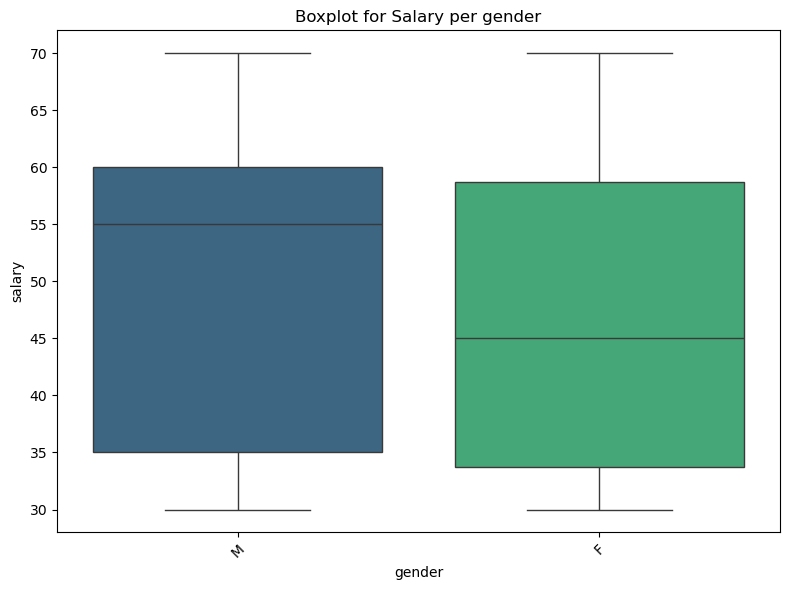

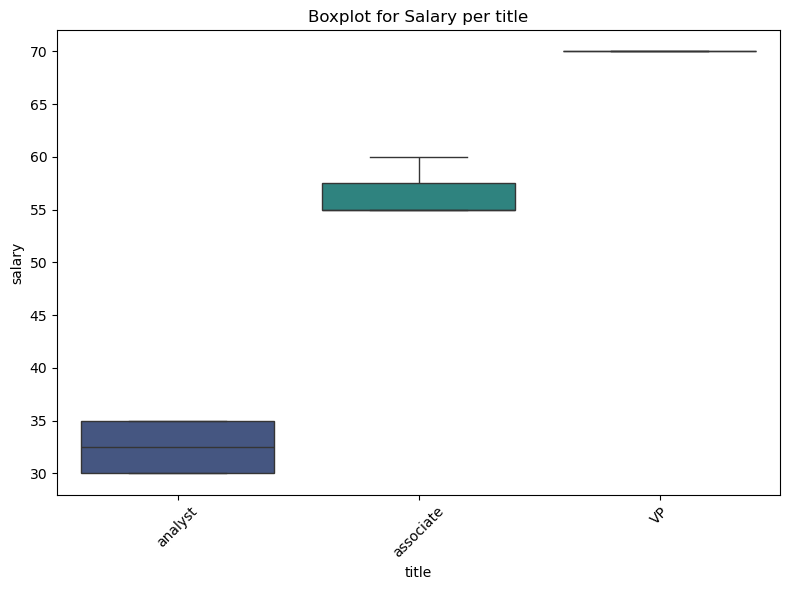

In [103]:
for column in cat.columns: 

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=employee, x=column, y="salary", palette='viridis')
    plt.title(f'Boxplot for Salary per {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('salary')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plot
plt.show()

In [105]:
employee['salary_4q'] = pd.qcut(employee['salary'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [106]:
# print first quartile here
q1 = employee[employee['salary_4q'] == 'Q1' ]
q1

,name,department,education,gender,title,years,salary,salary_4q
0,Jose,IT,Bachelor,M,analyst,1,35,Q1
1,Maria,IT,Master,F,analyst,2,30,Q1
2,David,HR,Master,M,analyst,2,30,Q1
3,Sonia,HR,Bachelor,F,analyst,4,35,Q1


In [107]:
# print third quartile here
q3 = employee[employee['salary_4q'] == 'Q3' ]
q3

,name,department,education,gender,title,years,salary,salary_4q
7,Pedro,IT,Phd,M,associate,7,60,Q3


Alternative way to calcuate Q1 and Q3

In [125]:
Q1 = employee['salary'].quantile(0.25)
Q3 = employee['salary'].quantile(0.75)
print(f"Q1 is {Q1} and Q3 is {Q3}")

Q1 is 35.0 and Q3 is 60.0


#### Is the mean salary per gender different?

In [109]:
employee.groupby('gender')['salary'].mean()

gender
F    47.5
M    50.0
Name: salary, dtype: float64

Yes, actually men earn more money average wise.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [111]:
num.describe().loc[['mean', 'min', 'max']].T

,mean,min,max
years,4.111111,1.0,8.0
salary,48.888889,30.0,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [114]:
department = employee.groupby("department")['salary'].agg(['min', 'max']).reset_index()
department

,department,min,max
0,HR,30,70
1,IT,30,70
2,Sales,55,55


In [124]:
# syntax for lambda difference = lambda min_salary, max_salary: max_salary - min_salary
department["difference"] = department.apply(lambda row: row['max'] - row['min'], axis=1 )
department

,department,min,max,difference
0,HR,30,70,40
1,IT,30,70,40
2,Sales,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [130]:
data_orders = pd.read_csv('Orders.csv')
orders = data_orders.copy()
orders.columns = [column.lower().replace(" ", "_") for column in orders.columns]

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [131]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unnamed:_0    397924 non-null  int64  
 1   invoiceno     397924 non-null  int64  
 2   stockcode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   description   397924 non-null  object 
 8   quantity      397924 non-null  int64  
 9   invoicedate   397924 non-null  object 
 10  unitprice     397924 non-null  float64
 11  customerid    397924 non-null  int64  
 12  country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [132]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
invoiceno,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
unitprice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
customerid,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [133]:
orders.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Comments: I see no null data, I see mostly the no datetime object, neither for day, month year, nor invoicedate. There is an unnamed column which purpose is not entirely clear. Looking at the summary statistics, I would exclude all datetime objects and customerid from the numerical dataframe.

####  What is the average Purchase Price?

Comment. I am not sure if purchase price is unit price or amount_spent

In [137]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [138]:
orders['amount_spent'].min()

0.0

In [139]:
orders['amount_spent'].max()

168469.6

#### Select all the customers we have in Spain

In [162]:
customers_spain = orders[orders['country'] == 'Spain']
customers_spain.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [146]:
customers_spain["customerid"].value_counts().shape

(30,)

In [147]:
customers_spain["customerid"].nunique()

30

#### Select all the customers who have bought more than 50 items ?

In [152]:
customers_nr_items = orders.groupby('customerid')['stockcode'].count().reset_index()

In [153]:
customers_nr_items

,customerid,stockcode
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,756


In [154]:
customer_over_50items = customers_nr_items[customers_nr_items["stockcode"] > 50]

In [155]:
customer_over_50items

,customerid,stockcode
1,12347,182
3,12349,73
5,12352,85
7,12354,58
9,12356,59
...,...,...
4320,18260,134
4323,18263,61
4328,18272,166
4337,18283,756


#### Select orders from Spain that are above 50 items

In [160]:
cust_spain_over50 = pd.merge(customers_spain, customer_over_50items, on='customerid', how='left')
cust_spain_over50.head()

,unnamed:_0,invoiceno,stockcode_x,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent,stockcode_y
0,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5,NaN
1,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0,NaN
2,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0,NaN
3,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5,NaN
4,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0,NaN


#### Select all free orders

In [161]:
free_orders = orders[orders["amount_spent"] == 0]
free_orders.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [163]:
lunch_bag = orders[orders['description'].str.contains(r'\blunch bag\b', regex=True, case=False)]
lunch_bag.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [166]:
lunch_bag_2011 = lunch_bag[lunch_bag["year"] == '2011']
lunch_bag_2011.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent


#### Show the frequency distribution of the amount spent in Spain.

In [180]:
customers_spain["amount_spent"].value_counts().reset_index()

,amount_spent,count
0,15.00,186
1,17.70,122
2,19.80,99
3,17.40,86
4,10.20,76
...,...,...
311,350.40,1
312,88.00,1
313,417.50,1
314,44.55,1


#### Select all orders made in the month of August

In [181]:
orders_august = orders[orders["month"] == 8]
orders_august.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [182]:
orders_august["country"].value_counts()

country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [177]:
orders.groupby("country")['amount_spent'].mean()

country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [176]:
index_max = orders["unitprice"].idxmax()
description_max = orders.loc[index_max, "description"]
print(f" THe most expensive item is {description_max} with a unit price of {orders["unitprice"].max()}")

 THe most expensive item is postage with a unit price of 8142.75


#### What was the average amount spent per year ?

In [172]:
orders.groupby("year")['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64